<a href="https://colab.research.google.com/github/avnishpandey113/DataScienceProject/blob/master/Assignment3_ExploringDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset chosen for this activity is taken from https://www.kaggle.com/danielgrijalvas/movies/version/2. It is a movie based dataset. It comprises of information like names of movies, actors, rating, imdb score. I have chosen this data because I wanted to find out what factors contribute to the success of a movie or what factors make a 'good' movie.

To explore the dataset, I downloaded the CSV file of dataset from kaggle and uploaded it to my google drive. This file is then imported from my google drive to google colab for further use.

In [0]:
#importing google drive using colab
from google.colab import drive

In [0]:
#Authorizing colab to access files in google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive

/content/gdrive


In [0]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
#importing required python libraries to read and explore the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data wasn't a pure utf-8 encoded data, thus specific encoding is used to read and put it into dataframe. 

In [0]:
#reading the csv dataset into dataframe
ledger = pd.read_csv('movies.csv', encoding = "ISO-8859-1")

In [0]:
ledger

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [0]:
#Finding number of instances and features
ledger.shape

(6820, 15)

While going through the above data, I found out that released date , year and name of movie will be irrelevant and wont be useful for the purpose of score or how good a movie is. 

In [0]:
#Removing irrelevant features
ledger.drop(['name','released','year'], axis = 1, inplace = True)

In [0]:
#Features and there datatype
ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 12 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
rating      6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 639.5+ KB


In [0]:
#new dimensions of dataset
ledger.shape

(6820, 12)

In [0]:
ledger.head(5)

,budget,company,country,director,genre,gross,rating,runtime,score,star,votes,writer
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,R,89,8.1,Wil Wheaton,299174,Stephen King
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,PG-13,103,7.8,Matthew Broderick,264740,John Hughes
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,PG,110,6.9,Tom Cruise,236909,Jim Cash
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,R,137,8.4,Sigourney Weaver,540152,James Cameron
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,PG,90,6.9,Joey Cramer,36636,Mark H. Baker


In [0]:
ledger.tail(5)

,budget,company,country,director,genre,gross,rating,runtime,score,star,votes,writer
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,R,91,5.4,Jennifer Saunders,9161,Jennifer Saunders
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,PG-13,90,4.9,Selma Blair,1959,Paige Cameron
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,R,76,6.5,Kevin Conroy,36333,Brian Azzarello
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,R,76,6.2,Kika Magalhães,6947,Nicolas Pesce
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,R,120,6.7,Marion Cotillard,2411,Milena Agus


By going through the first and last few values of the dataset, I found out that values of 'budget' feature doesn't have missing values but lots of values are 0, but since we need this feature for analysis, the missing budget values will be taken as mean of budget.

In [0]:
#numerical stats for features
ledger.describe()

,budget,gross,runtime,score,votes
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06


In [0]:
#replacing missing budget values with mean
new_budget = np.where(ledger["budget"] == 0.0,
                      2.458113e+07,
                      ledger["budget"])

In [0]:
ledger["budget"] = new_budget

In [0]:
#stats with updated budget values
ledger.tail(5)

,budget,company,country,director,genre,gross,rating,runtime,score,star,votes,writer
6815,24581130.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,R,91,5.4,Jennifer Saunders,9161,Jennifer Saunders
6816,24581130.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,PG-13,90,4.9,Selma Blair,1959,Paige Cameron
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,R,76,6.5,Kevin Conroy,36333,Brian Azzarello
6818,24581130.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,R,76,6.2,Kika Magalhães,6947,Nicolas Pesce
6819,24581130.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,R,120,6.7,Marion Cotillard,2411,Milena Agus


Plotting different features to find out intresting trends in the data.

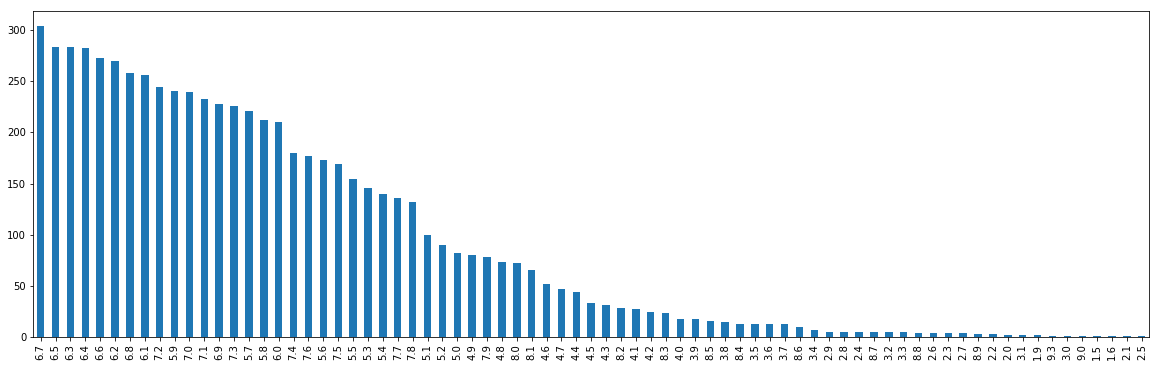

In [0]:
ledger['score'].value_counts().plot(kind='bar', figsize=[20,6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b6fab3c8>]],
      dtype=object)

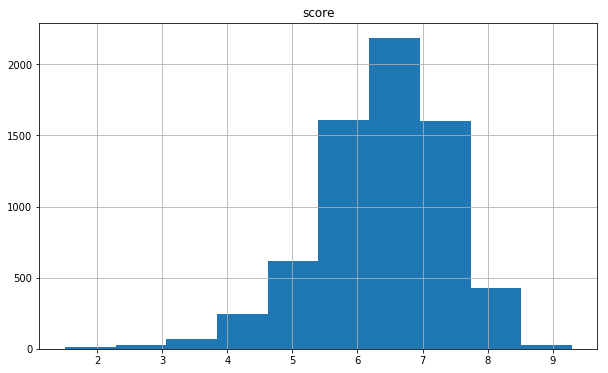

In [0]:
ledger.hist(column='score',
           figsize=(10,6),
           bins=10)

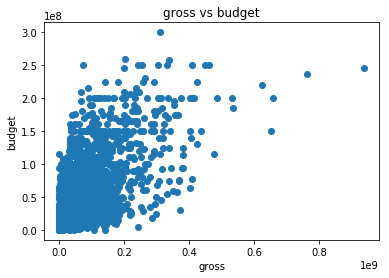

In [0]:
x = ledger['gross']
y = ledger['budget']
plt.title("gross vs budget")
plt.xlabel("gross")
plt.ylabel("budget")
plt.scatter(x,y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b7311cc0>]],
      dtype=object)

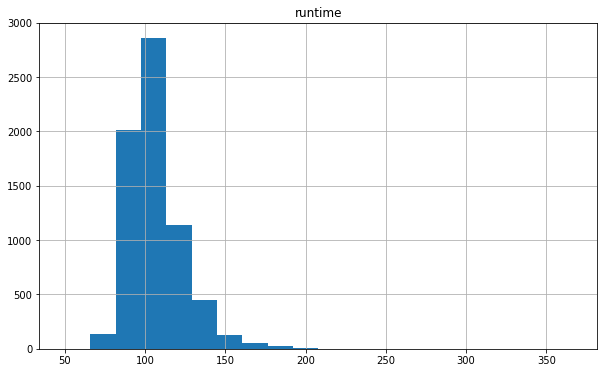

In [0]:
ledger.hist(column='runtime',
           figsize=(10,6),
           bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dda1d1d30>]],
      dtype=object)

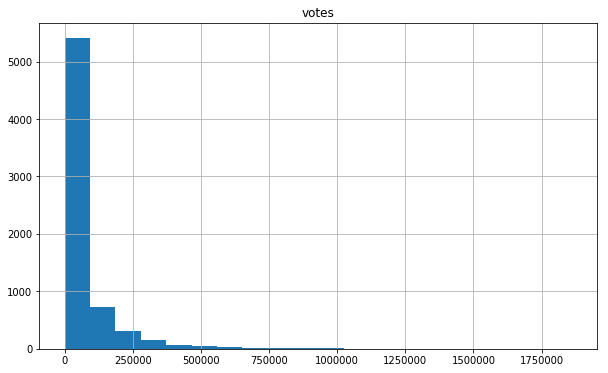

In [0]:
ledger.hist(column='votes',
           figsize=(10,6),
           bins=20)

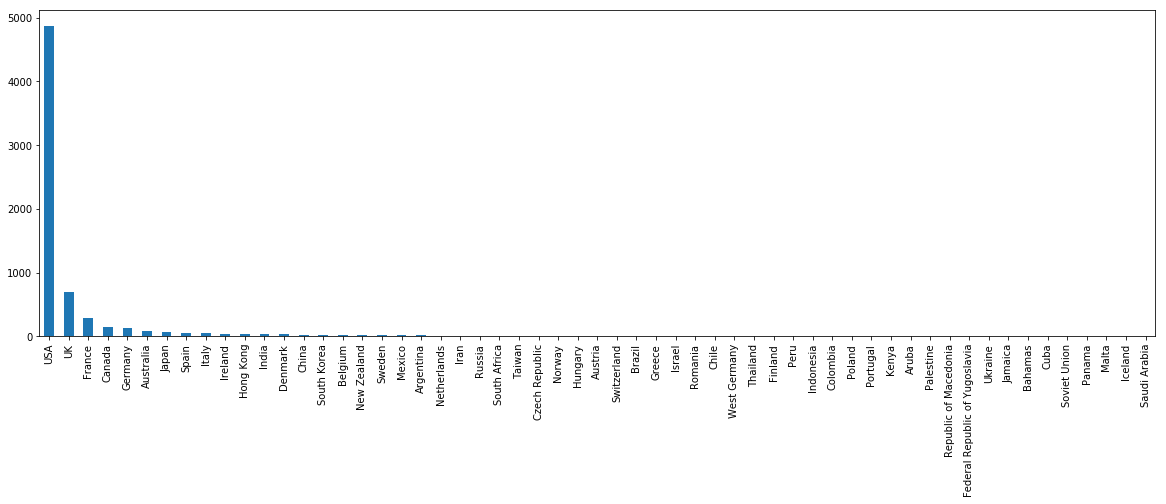

In [0]:
ledger['country'].value_counts().plot(kind='bar', figsize=[20,6])

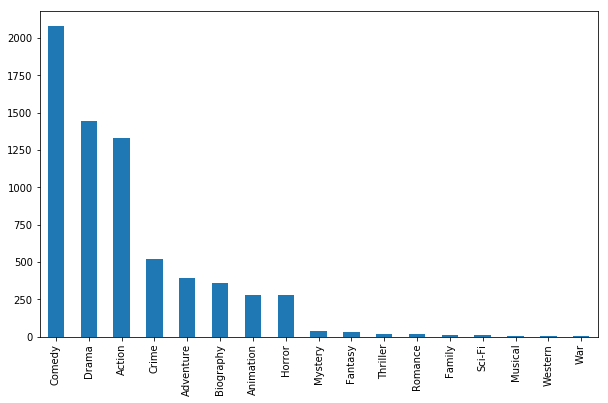

In [0]:
ledger['genre'].value_counts().plot(kind='bar', figsize=[10,6])

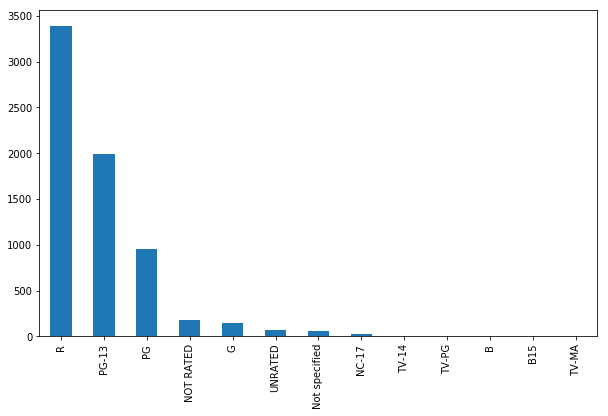

In [0]:
ledger['rating'].value_counts().plot(kind='bar', figsize=[10,6])

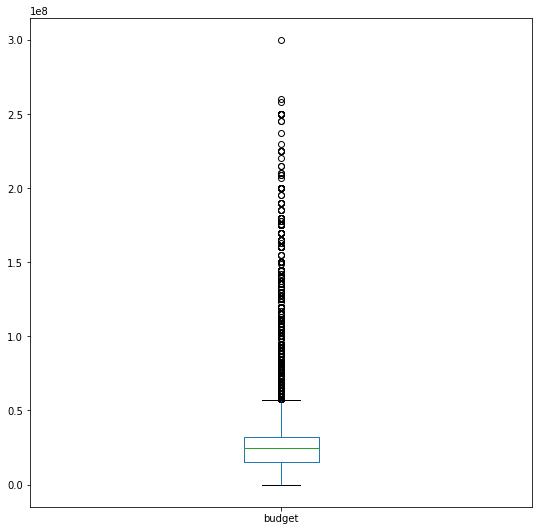

In [0]:
ledger["budget"].plot(kind="box", figsize=(9,9))

In [0]:
index = np.where(ledger["budget"] == max(ledger["budget"]))

In [0]:
ledger.loc[index]

,budget,company,director,genre,gross,name,rating,runtime,score,star,votes,writer,year
4631,300000000.0,Walt Disney Pictures,Gore Verbinski,Action,309420425.0,Pirates of the Caribbean: At World's End,PG-13,169,7.1,Johnny Depp,514191,Ted Elliott,2007


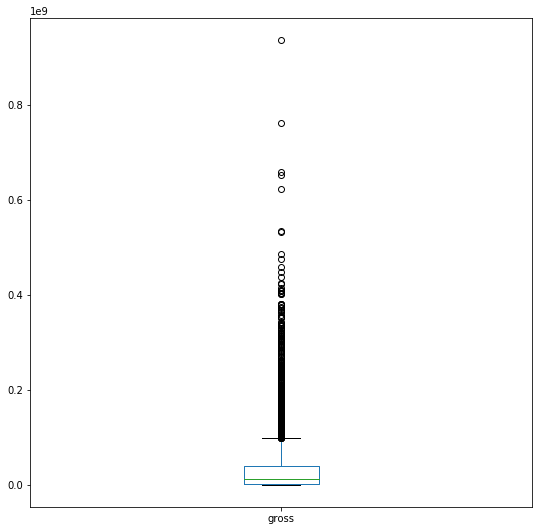

In [0]:
ledger["gross"].plot(kind="box", figsize=(9,9))

In [0]:
index = np.where(ledger["gross"] == max(ledger["gross"]))

In [0]:
ledger.loc[index]

,budget,company,director,genre,gross,name,rating,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015


Intresting patterns found out:


1. Most movies have imdb rating/score between 6-7.
2. More the budget ,more the gross/profit.
3. Most movies have a runtime of ~80 to 120 minutes.
4. Most movie scores are based on ~100K votes. 
5.70% of movies are from USA.
6. Most movies have comedy genre.
7. Most movies are "R" rated.
8. ~0.6e8 to ~1.2e8 is the budget for most movies.
9. ~0.1e9 to ~0.38e9 is the gross for most movies.
10. Movie with the highest budget isnt the the highest grosser,nor the highest rating.
11. The highest grosser movie is PG-13 , is of action genre, has 136 minutes of runtime and is lying in the highest number of votes.  
Thus the relationships between the factors is approximate. 
A model that would be able to judge a movie between poor and excellent based on these factors will be useful. It'll be easy for the user to judge a movie by its category too as he'll know at the first look of the category whether to wacth the movie or not rather than score which can get confusing at times. Since I want to predict the quality of a movie based on the factors, classification models would prove useful as it'll help categorize the movie.